# Investigating malware propagation and behaviour using system and network pixel-based visualisation
### Jacob Williams and Phil Legg
### University of the West of England (UWE Bristol)

Malicious software, often known as malware, is a perpetual game of cat and mouse between malicious software developers and security professionals. Recent years have seen many high profile cyber attacks, including the Wannacry and NotPetya ransomware attacks that resulted in major financial damages to many businesses and institutions. Understanding the characteristics of such malware, including how malware can propagate across systems and networks, is key for mitigating these threats and containing the infection to avoid further damage. In this study, we present visualisation techniques for understanding the propagation characteristics in dynamic malware analysis. We propose the use of pixel-based visualisations to convey large-scale complex information about network hosts in a scalable and informative manner. We demonstrate our approach using a virtualised network environment, whereby we can deploy malware variants and observe their propagation behaviours. As a novel form of visualising system and network activity data across a complex environment, we can begin to understand visual signatures that can help analysts identify key characteristics of the malicious behaviours, and therefore provoke response and mitigation against such attacks.

## 1 : Parse and transform data

We call a Python script for parsing and transforming the data sources correctly. The output is a set of CSV files that denote system and network parameters at given time periods.


In [79]:
%run -i 202107-malvis-extractcsv.py -all

Investigating malware propagation and behaviour using system and network visualisation techniques
 -Options: cpu-ram: True
 -Options: screen:  True
 -Options: net:  True
 -Options: proc:  True
Start data extraction...
Parsing CPU and RAM usage...
First file:  05-07-2021-11-45-21.data
Last file:  05-07-2021-12-01-36.data
Parsing screen captures...
Skip during data extract phase...
Parsing network activity...
First row:  No.                                                            1
Time                                          11:47:19.402128054
Source                                                10.10.5.11
Destination                                           10.10.5.10
Protocol                                                     TCP
Length                                                      5108
Info           49205  >  1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ...
Name: 0, dtype: object
Last row:  No.                                         34470
Time                           12:00:5

## 2: Visualise data

We will retrieve the data from Part 1 from the CSV output files. We will explore both traditional line plot representations, and pixel-based representations of the data.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#input_dir = 'results_20210705_wannacry'
input_dir = 'results_20210722_notpetya'

#screen_input_directory = './data/20210705_wannacry'
screen_input_directory = './data/20210722_notpetya'

cpu = pd.read_csv(input_dir + '/cpu.csv')
ram = pd.read_csv(input_dir + '/ram.csv')
net1_0 = pd.read_csv(input_dir + '/net1_0.csv')
net2_0 = pd.read_csv(input_dir + '/net2_0.csv')
proc1 = pd.read_csv(input_dir + '/procNode1-PC.csv')
proc2 = pd.read_csv(input_dir + '/procNode2-PC.csv')
proc3 = pd.read_csv(input_dir + '/procNode3-PC.csv')
proc4 = pd.read_csv(input_dir + '/procNode4-PC.csv')
proc = pd.concat([proc1, proc2, proc3, proc4])

net1_0  = net1_0.iloc[: , 1:]
net2_0  = net2_0.iloc[: , 1:]
proc  = proc.iloc[: , 1:]
cpu = cpu.iloc[:, 1:]
ram = ram.iloc[:, 1:]

In [124]:
# Explore a table of data - e.g., cpu, ram, proc, net1_0
ram

,0,1,2,3,4,5,6,7,8,9,...,337,338,339,340,341,342,343,344,345,346
0,Win7_64bit_node_1,0.991178,0.990705,0.996510,0.990717,0.990717,0.990717,0.990717,0.996570,0.998478,...,0.987107,0.987957,0.987107,0.987107,0.987107,0.987107,0.987107,0.987107,0.987107,0.987957
1,Win7_64bit_node_2,1.000000,0.995999,0.989730,0.989781,0.989784,0.989603,0.989603,0.989603,0.989799,...,0.995277,0.995283,0.995277,0.995277,0.995277,0.995283,0.995289,0.995277,0.995283,0.995277
2,Win7_64bit_node_3,0.990802,0.997612,0.991684,0.986277,0.985775,0.986392,0.983530,0.983251,0.980327,...,0.996045,0.996045,0.996045,0.996051,0.996045,0.996045,0.996045,0.996045,0.996045,0.996045
3,Win7_64bit_node_4,0.978428,0.991405,0.981563,0.976078,0.970495,0.974627,0.974627,0.981174,0.975544,...,0.992079,0.991208,0.991208,0.991208,0.991208,0.991208,0.991220,0.991220,0.991208,0.991208


### Line Plot Example

In [125]:
def create_line_plot(df):
    mat = np.array(df)
    plt.figure(figsize=(50,10))
    plt.plot(mat[:, 3:].transpose())
    plt.show()

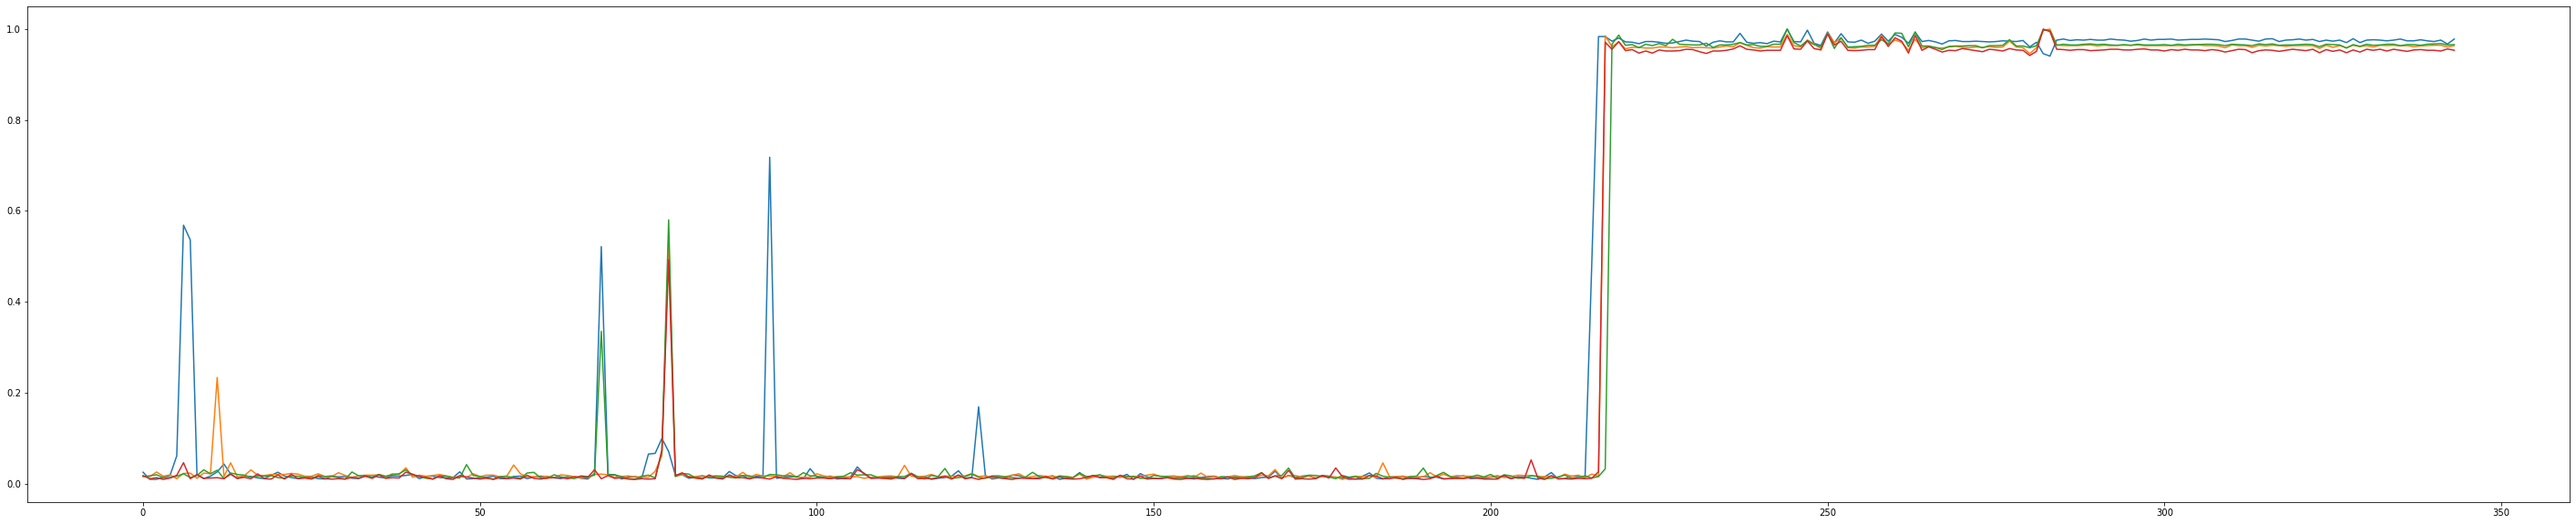

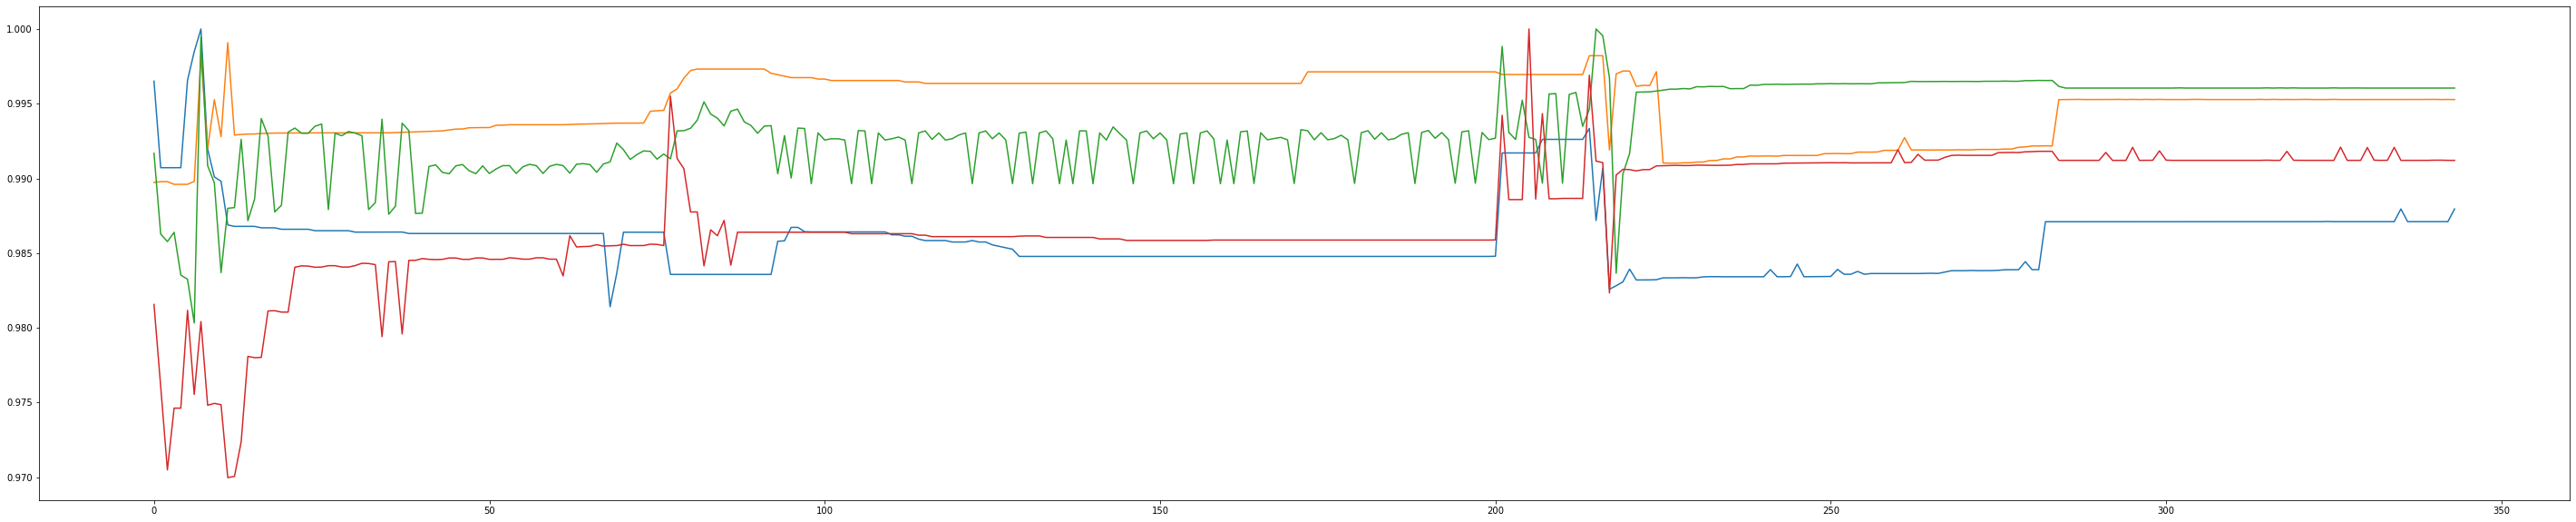

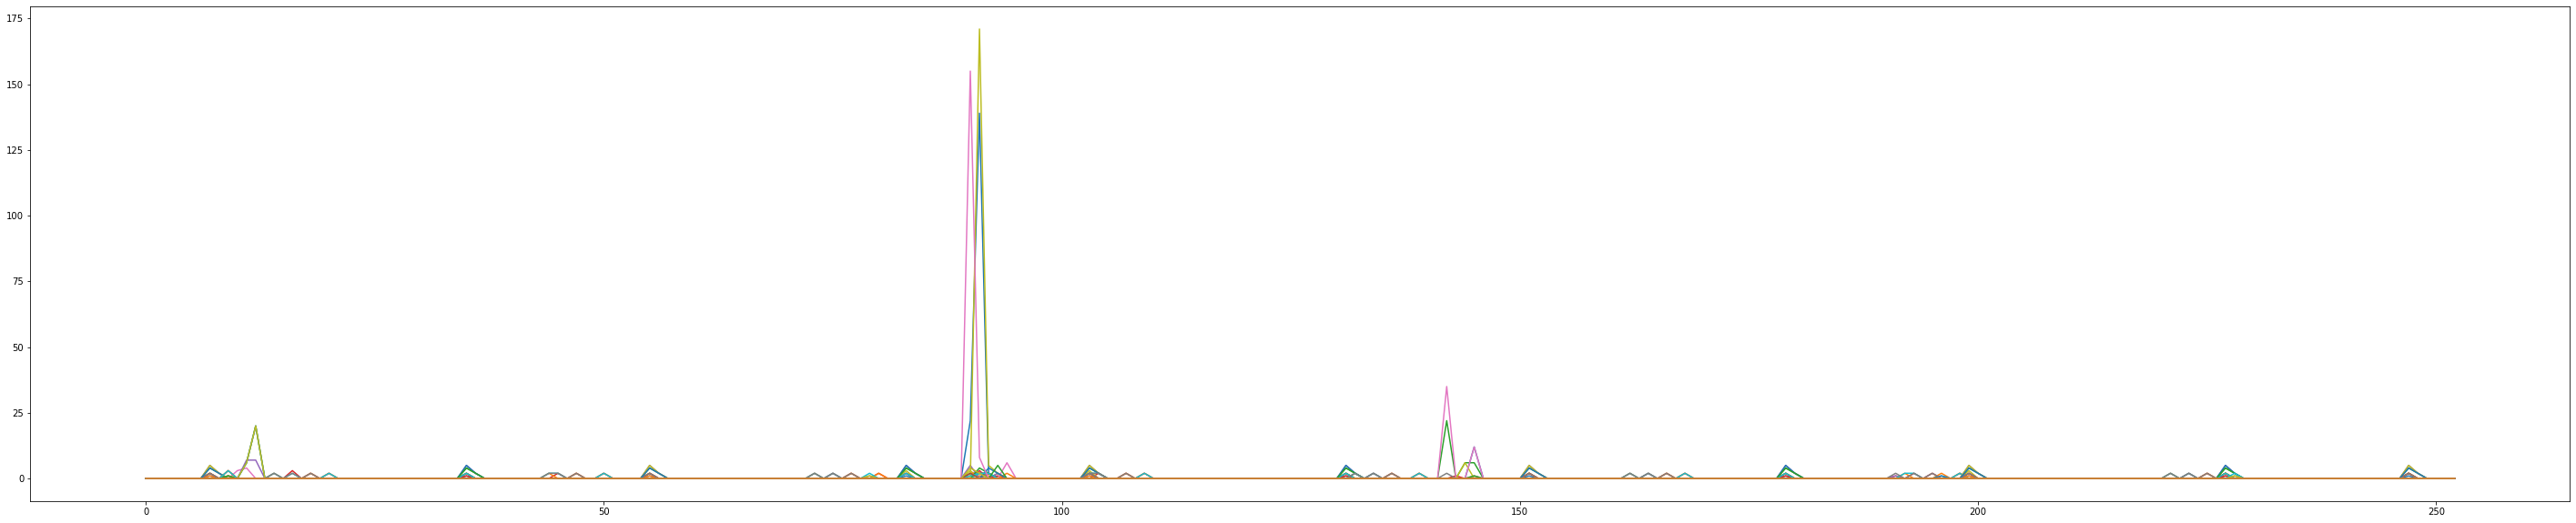

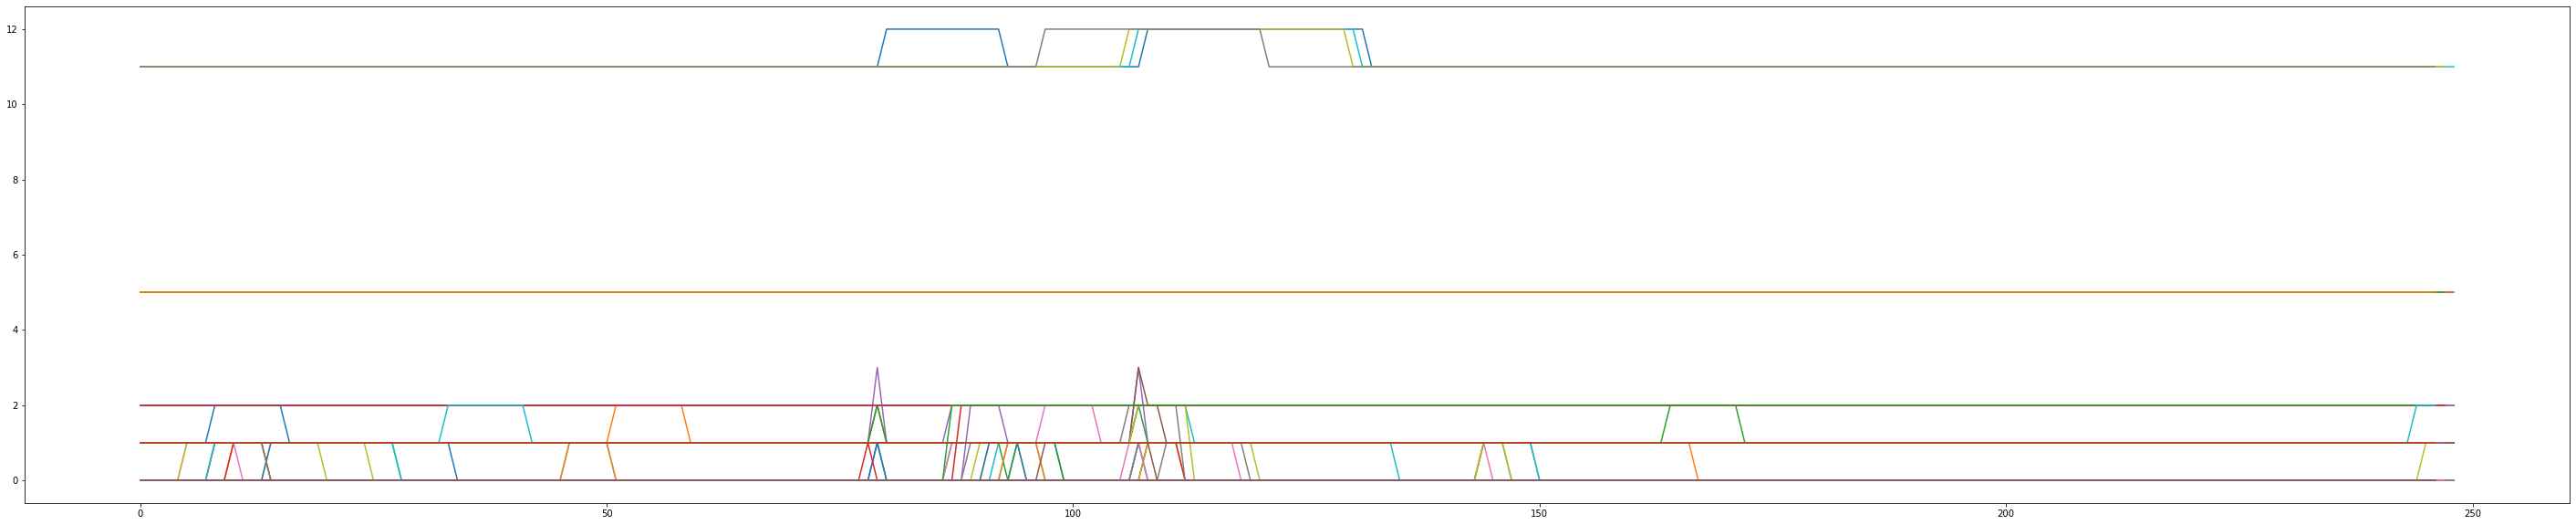

In [126]:
create_line_plot(cpu)
create_line_plot(ram)
create_line_plot(net1_0)
create_line_plot(proc)

### Step 1: Generate Pixel-based Examples

In [127]:
sys_cols = [[230,25,75], [60,180,75], [255,225,25], [67,99,216], [245,130,49], [145,30,180], [66,212,244], [240,50,230], [191,239,69], [250,190,212], [70,153,144], [220,190,255],[154,99,36], [255,250,200], [128,0,0], [170,255,195]]
grey = 192

def create_pixel_plot(df, filename):
    if filename == 'cpu' or filename == 'ram':
        d = np.array(df.iloc[:,1:])
    else:
        d = np.array(df.iloc[:,2:])
        
    d = np.nan_to_num(d) 
        
    groups = list(df['0'].unique())
    print (groups)
        
    pixel_size = 1
    max_pixel_size = 9
    offset = 20
    output_image = np.ones([d.shape[0]*max_pixel_size, d.shape[1]*max_pixel_size, 3]) * 255

    for y in range(d.shape[0]):
        for x in range(d.shape[1]):
            
            s = df.iloc[y,0]
            #print (s)
            g = groups.index(s)
            #print (g)

            c = int(max_pixel_size/2)
            point_y = y * max_pixel_size + c
            point_x = x * max_pixel_size + c

            for i in range(-c,+c+1):
                for j in range(-c,+c+1):
                    if i == -c or i == (+c):
                        output_image[point_y+i,point_x+j, 0] = sys_cols[g][0]
                        output_image[point_y+i,point_x+j, 1] = sys_cols[g][1]
                        output_image[point_y+i,point_x+j, 2] = sys_cols[g][2]
                    if j == -c or j == (+c):
                        output_image[point_y+i,point_x+j, 0] = sys_cols[g][0]
                        output_image[point_y+i,point_x+j, 1] = sys_cols[g][1]
                        output_image[point_y+i,point_x+j, 2] = sys_cols[g][2]

            value = d[y,x]
            mean_value = np.mean(d[y,:])
            #print (value, mean_value)
            
            if value > (2*mean_value):
                pixel_size = 4
            elif value > mean_value:
                pixel_size = 2
            elif value > 0.0:
                pixel_size = 1
            else:
                pixel_size = 0
                
            if pixel_size > 0:
                point_y = y * max_pixel_size + int(max_pixel_size/2)
                point_x = x * max_pixel_size + int(max_pixel_size/2)

                for i in range(-int(pixel_size),int(pixel_size+1)):
                    for j in range(-int(pixel_size),int(pixel_size+1)):
                        output_image[point_y+i,point_x+j, 0] = 240
                        output_image[point_y+i,point_x+j, 1] = 128
                        output_image[point_y+i,point_x+j, 2] = 100

    plt.imsave(input_dir + '/' + filename + '.png', output_image.astype(np.uint8))
    
    
    
    
def create_network_pixel_plot(df, df2, filename):
    d = np.array(df.iloc[:,2:])
    d2 = np.array(df2.iloc[:,2:])
    
    d = np.nan_to_num(d) 
    d2 = np.nan_to_num(d2) 
        
    groups = list(df['0'].unique())
    print (groups)
        
    pixel_size = 1
    max_pixel_size = 9
    offset = 20
    output_image = np.ones([d.shape[0]*max_pixel_size, d.shape[1]*max_pixel_size, 3]) * 255

    for y in range(d.shape[0]):
        for x in range(d.shape[1]):
            
            s = df.iloc[y,0]
            #print (s)
            g = groups.index(s)
            #print (g)

            c = int(max_pixel_size/2)
            point_y = y * max_pixel_size + c
            point_x = x * max_pixel_size + c

            for i in range(-c,+c+1):
                for j in range(-c,+c+1):
                    if i == -c or i == (+c):
                        output_image[point_y+i,point_x+j, 0] = sys_cols[g][0]
                        output_image[point_y+i,point_x+j, 1] = sys_cols[g][1]
                        output_image[point_y+i,point_x+j, 2] = sys_cols[g][2]
                    if j == -c or j == (+c):
                        output_image[point_y+i,point_x+j, 0] = sys_cols[g][0]
                        output_image[point_y+i,point_x+j, 1] = sys_cols[g][1]
                        output_image[point_y+i,point_x+j, 2] = sys_cols[g][2]

            value = d[y,x]
            mean_value = np.mean(d[y,:])
            #print (value, mean_value)
            
            if value > (2*mean_value):
                pixel_size = 4
            elif value > mean_value:
                pixel_size = 2
            elif value > 0.0:
                pixel_size = 1
            else:
                pixel_size = 0

            point_y = y * max_pixel_size + int(max_pixel_size/2)
            point_x = x * max_pixel_size + int(max_pixel_size/2)
            
            value_index = int(d2[y,x])
            if value_index > -1:
                if pixel_size > 0:
                    for i in range(-int(pixel_size),int(pixel_size+1)):
                        for j in range(-int(pixel_size),int(pixel_size+1)):
                            output_image[point_y+i,point_x+j, 0] = sys_cols[value_index][0]
                            output_image[point_y+i,point_x+j, 1] = sys_cols[value_index][1]
                            output_image[point_y+i,point_x+j, 2] = sys_cols[value_index][2]

    plt.imsave(input_dir + '/' + filename + '.png', output_image.astype(np.uint8))
    
    
    
    

def create_process_pixel_plot(df, filename):
    if filename == 'cpu' or filename == 'ram':
        d = np.array(df.iloc[:,1:])
    else:
        d = np.array(df.iloc[:,2:])
        
    d = np.nan_to_num(d) 
    print ("D", d)
        
    groups = list(df['0'].unique())
    print (groups)
        
    pixel_size = 1
    max_pixel_size = 9
    offset = 20
    output_image = np.ones([d.shape[0]*max_pixel_size, d.shape[1]*max_pixel_size, 3]) * 255

    for y in range(d.shape[0]):
        for x in range(d.shape[1]):
            
            s = df.iloc[y,0]
            #print (s)
            g = groups.index(s)
            #print (g)

            c = int(max_pixel_size/2)
            point_y = y * max_pixel_size + c
            point_x = x * max_pixel_size + c

            for i in range(-c,+c+1):
                for j in range(-c,+c+1):
                    if i == -c or i == (+c):
                        output_image[point_y+i,point_x+j, 0] = sys_cols[g][0]
                        output_image[point_y+i,point_x+j, 1] = sys_cols[g][1]
                        output_image[point_y+i,point_x+j, 2] = sys_cols[g][2]
                    if j == -c or j == (+c):
                        output_image[point_y+i,point_x+j, 0] = sys_cols[g][0]
                        output_image[point_y+i,point_x+j, 1] = sys_cols[g][1]
                        output_image[point_y+i,point_x+j, 2] = sys_cols[g][2]

            value = d[y,x]
            print ("Data:", d[y,:])
            mean_value = np.mean(d[y,:])
            print ("Value:", value, "Mean Value:", mean_value)
            
            if value > (2*mean_value):
                pixel_size = 4
            elif value > mean_value:
                pixel_size = 2
            elif value > 0.0:
                pixel_size = 1
            else:
                pixel_size = 0
                

            point_y = y * max_pixel_size + int(max_pixel_size/2)
            point_x = x * max_pixel_size + int(max_pixel_size/2)
            
            if pixel_size > 0:
                for i in range(-int(pixel_size),int(pixel_size+1)):
                    for j in range(-int(pixel_size),int(pixel_size+1)):
                        output_image[point_y+i,point_x+j, 0] = 240
                        output_image[point_y+i,point_x+j, 1] = 128
                        output_image[point_y+i,point_x+j, 2] = 100

    plt.imsave(input_dir + '/' + filename + '.png', output_image.astype(np.uint8))
    


In [128]:
create_pixel_plot(cpu, 'cpu')
create_pixel_plot(ram, 'ram')
create_pixel_plot(net1_0, 'net1_0')
create_network_pixel_plot(net1_0, net2_0, 'net')
create_pixel_plot(proc, 'proc')

['Win7_64bit_node_1', 'Win7_64bit_node_2', 'Win7_64bit_node_3', 'Win7_64bit_node_4']
['Win7_64bit_node_1', 'Win7_64bit_node_2', 'Win7_64bit_node_3', 'Win7_64bit_node_4']
['10.10.5.11', '10.10.5.12', '10.10.5.13', '10.10.5.14']
['10.10.5.11', '10.10.5.12', '10.10.5.13', '10.10.5.14']
['Node1-PC', 'Node2-PC', 'Node3-PC', 'Node4-PC']


### Step 3: Appending Text Labels to the Pixel-based Visualisations

In [130]:
def append_text_to_image(text, filename, filename_out):
    max_pixel_size = 9
    
    img = plt.imread(filename)
    img = img * 255
    img2 = np.ones([ img.shape[0], 100, img.shape[2] ]) * 255
    img_out = np.hstack([img, img2])
    plt.imsave(filename_out, img_out.astype(np.uint8))
    
    from PIL import Image, ImageDraw, ImageFont
    img_text = Image.open(filename_out)
    for names in range(len(text)):
        d1 = ImageDraw.Draw(img_text)
        myFont = ImageFont.truetype("./fonts/Helvetica.ttf", 8)
        d1.text((img.shape[1], (names*max_pixel_size)), text[names], font=myFont, fill = (192, 192, 192))
    img_text.save(filename_out)

In [131]:
append_text_to_image(list(proc.iloc[:,1]), input_dir + '/proc_axis.png', input_dir + '/proc_text.png')
append_text_to_image(list(net1_0.iloc[:,1]), input_dir + '/net_axis.png', input_dir + '/net_text.png')
#append_text_to_image(list(net1_0.iloc[:,1]), input_dir + '/net1_0.png', input_dir + '/net1_0_text.png')
append_text_to_image(list(cpu.iloc[:,0]), input_dir + '/cpu_axis.png', input_dir + '/cpu_text.png')
append_text_to_image(list(ram.iloc[:,0]), input_dir + '/ram_axis.png', input_dir + '/ram_text.png')

### Step 4: Creating the Screenshot comparison image

In [103]:
def create_screenshot_image(directory, output_file):
    max_pixel_size = 9
    time_period = 4
    screenshot_size = max_pixel_size * time_period
    
    nodes = []
    for i in range(4): # 4 nodes used
        nodes.append([])
    for i in sorted(os.listdir(directory)):
        if 'png' in i:
            if 'node_1' in i:
                if len(nodes[0]) == 0:
                    nodes[0].append(i)
                else:
                    parts = nodes[0][len(nodes[0])-1].split('-')
                    new_parts = i.split('-')
                    if parts[3] == new_parts[3] and parts[4] == new_parts[4]:
                        pass
                    else:
                        nodes[0].append(i)
            elif 'node_2' in i:
                if len(nodes[1]) == 0:
                    nodes[1].append(i)
                else:
                    parts = nodes[1][len(nodes[1])-1].split('-')
                    new_parts = i.split('-')
                    if parts[3] == new_parts[3] and parts[4] == new_parts[4]:
                        pass
                    else:
                        nodes[1].append(i)
            elif 'node_3' in i:
                if len(nodes[2]) == 0:
                    nodes[2].append(i)
                else:
                    parts = nodes[2][len(nodes[2])-1].split('-')
                    new_parts = i.split('-')
                    if parts[3] == new_parts[3] and parts[4] == new_parts[4]:
                        pass
                    else:
                        nodes[2].append(i)
            elif 'node_4' in i:
                if len(nodes[3]) == 0:
                    nodes[3].append(i)
                else:
                    parts = nodes[3][len(nodes[3])-1].split('-')
                    new_parts = i.split('-')
                    if parts[3] == new_parts[3] and parts[4] == new_parts[4]:
                        pass
                    else:
                        nodes[3].append(i)
    
    from skimage.transform import rescale, resize, downscale_local_mean
    
    def resize_image(image):
        image_resized = resize(image, (screenshot_size,screenshot_size), anti_aliasing=True)
        return image_resized
    
    image = []
    for i in range(4): # 4 nodes used
        image.append([])
        image[i] = resize_image(plt.imread(directory + '/' + nodes[i][0]))
        for jj in range(len(nodes[i])):
            #print ("resize: ", nodes[i][jj])
            #print (jj, gap_freq, jj % gap_freq)
            new_screen = resize_image(plt.imread(directory + '/' + nodes[i][jj]))
            image[i] = np.hstack([image[i], new_screen])
    
    image_stack = np.vstack( [image[0], image[1], image[2], image[3] ])
    plt.imsave(output_file, image_stack)
    return image_stack
    

In [132]:
import os

output_file_name = input_dir + '/screen_capture.png'
screenstack = create_screenshot_image(screen_input_directory, output_file_name)

### Step 5: Appending the Screenshot Stack with the data visualisation views

In [133]:
def stack_screenshot_with_data(screen_img_name, data_img_name, filename_out, trim):
    screen_img = plt.imread(screen_img_name)
    data_img = plt.imread(data_img_name)
    screen_img = screen_img * 255
    data_img = data_img * 255
    if (trim):
        if screen_img.shape[1] > data_img.shape[1]:
            screen_img = screen_img[:,0:data_img.shape[1], :]
        elif data_img.shape[1] > screen_img.shape[1]:
            data_img = data_img[:,0:screen_img.shape[1], :]
    else:
        if screen_img.shape[1] > data_img.shape[1]:
            data_img2 = np.ones([ data_img.shape[0], screen_img.shape[1], data_img.shape[2] ]) * 255
            data_img2[:,0:data_img.shape[1], :] = data_img
            data_img = data_img2
        elif data_img.shape[1] > screen_img.shape[1]:
            screen_img2 = np.ones([ screen_img.shape[0], data_img.shape[1], screen_img.shape[2] ]) * 255
            screen_img2[:,0:screen_img.shape[1], :] = screen_img
            screen_img = screen_img2
    img_out = np.vstack([screen_img, data_img])
    plt.imsave(filename_out, img_out.astype(np.uint8))

In [134]:
stack_screenshot_with_data(input_dir + '/screen_capture.png', input_dir + '/cpu.png', input_dir + '/screen_cpu.png', trim=True)
stack_screenshot_with_data(input_dir + '/screen_capture.png', input_dir + '/ram.png', input_dir + '/screen_ram.png', trim=True)
stack_screenshot_with_data(input_dir + '/screen_capture.png', input_dir + '/net.png', input_dir + '/screen_net.png', trim=True)
stack_screenshot_with_data(input_dir + '/screen_capture.png', input_dir + '/proc.png', input_dir + '/screen_proc.png', trim=True)

stack_screenshot_with_data(input_dir + '/screen_capture.png', input_dir + '/cpu_text.png', input_dir + '/screen_cpu_text.png', trim=False)
stack_screenshot_with_data(input_dir + '/screen_capture.png', input_dir + '/ram_text.png', input_dir + '/screen_ram_text.png', trim=False)
stack_screenshot_with_data(input_dir + '/screen_capture.png', input_dir + '/net_text.png', input_dir + '/screen_net_text.png', trim=False)
stack_screenshot_with_data(input_dir + '/screen_capture.png', input_dir + '/proc_text.png', input_dir + '/screen_proc_text.png', trim=False)

# Step 2: Add Time Axis

We can add a simple time axis to the image to represent every X minutes of activity. (Default: 10 minutes)

In [129]:
def add_time_axis(input_file, output_file):
    img = plt.imread(input_file)
    temp_file = 'markers_only.png'
    time_img = np.ones([ 20, img.shape[1], img.shape[2] ])
    
    print ("Time img", time_img.shape)
    
    marker_gap = int(9 * 4)
    
    number_of_markers = int(time_img.shape[1] / marker_gap)
    
    for i in range(number_of_markers):
        time_img[:, i * marker_gap, 0] = 1.0
        time_img[:, i * marker_gap, 1] = 0.0
        time_img[:, i * marker_gap, 2] = 1.0
        
    plt.imsave(temp_file, time_img)
    
    from PIL import Image, ImageDraw, ImageFont
    img_text = Image.open(temp_file)
    for i in range(number_of_markers):
        d1 = ImageDraw.Draw(img_text)
        myFont = ImageFont.truetype("./fonts/Helvetica.ttf", 10)
        d1.text(((i * marker_gap)+2, 10), str(i), font=myFont, fill = (192, 192, 192))
    img_text.save(temp_file)
    
    img_axis = plt.imread(temp_file)
    img2 = np.vstack([img, img_axis])
    plt.imsave(output_file, img2)
    
        
    
    
    
add_time_axis(input_dir + '/screen_capture.png', input_dir + '/screen_capture_axis.png')
add_time_axis(input_dir + '/cpu.png', input_dir + '/cpu_axis.png')
add_time_axis(input_dir + '/ram.png', input_dir + '/ram_axis.png')
add_time_axis(input_dir + '/net.png', input_dir + '/net_axis.png')
add_time_axis(input_dir + '/proc.png', input_dir + '/proc_axis.png')


Time img (20, 3528, 4)
Time img (20, 3114, 4)
Time img (20, 3114, 4)
Time img (20, 2286, 4)
Time img (20, 2250, 4)
